# TP 4 Regression logistique avec régularisation
Dans ce TP, nous aimerions faire une classification binaire en utilisant la régression.

Pour ce faire, nous étudierons un ensemble de données avec la variable  (y) representant la commercialisation d'un profuit et les caractéristiques (X) representant les résultat des tests de qualité test 1 et test 2 du produit.

La prédiction se fera avec l'agorithme de descente du gradient avec régularisation.

# Importation des librairies necessaires au travail

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import time
from numpy.linalg import pinv

# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [2]:
# données
data = np.genfromtxt('data.csv', delimiter=',', dtype=float)
data.shape

(118, 3)

Dans ces données (data), la première colonne represente la première note, la deuxieme colonne la deuxième note et la troisième colonne represente la commercialisation (1 oui 0 non).

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [3]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,0:2]))
y = data[:, 2];
# forcer y à avoir une seule colonne
y = y.reshape( y.shape[0], 1)

In [4]:
print('X', X.shape ,' y ', y.shape)

X (118, 3)  y  (118, 1)


# Transformation de données
Dans cette partie, nous aimerions transformer nos données afin d'avoir une fonction polynomiale de degrée 6.

La fonction sera:

$x_0=1$

$x_1=x_1$

$x_2=x_2$

$x_3={x_1}^2$

$x_4={x_1}x_2$

$x_5={x_2}^2$

$x_6={x_1}^3$

$x_7={x_1}^2 x_2$

$x_8= x_1 {x_2}^2$

$x_9= {x_2}^3$

...


Pour un polynme de degrée 6 à 2 variables nous aurons 28 caracteristiques

**Question**: comment avons nous trouvé ce chiffre?

**Astuce**: référez vous aux probabilités

In [5]:
def mapping(X):
    
    cols = 28
    degree=7
    outX= np.ones((X.shape[0],cols))
    X1=X[:,1]
    X2=X[:,2]
    k=0
    for i in range(degree):
        for j in range(i+1):
            outX[:, k] = np.power(X1,i-j)*(np.power(X2,j));
            k=k+1
    return outX    


In [6]:
X2=mapping(X)
X2.shape

(118, 28)

# Descente du Gradient : Préparation des fonctions

0- Fonction mpgistique (Sigmoid)

In [7]:
def Sigmoid(z):
    # pour une valeur donnée, cette fonction calculera sa sigmoid
    return 1/(1+np.exp(-z));
 

In [8]:
k=Sigmoid(-10)
k

4.5397868702434395e-05

1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

In [14]:
def computeCostReg(X2, y, theta):
    jt=0
    for i in range(len(X)):
        j=0
        for k in range(X.shape[1]):
            j=j+theta[k][0]*X[i,k]
#             print(j)
        j=y[i]*math.log(Sigmoid(j)+0.00001)+(1-y[i])*math.log(1-Sigmoid(j)+0.00001)
        jt=jt+j
    jt=(-jt)/((len(X)))
    t=0
    for i in range(len(theta)):
        if(i!=0):
            t=t+theta[i][0]**2
    t=t/(2*len(X2))
    jt=jt+t
    return jt
print(computeCostReg(X2, y, theta))

[0.69312718]


In [30]:
def computeCostAvecVectorisation(X, y, theta):
    z=X@theta
    m=len(z)
    cout=0
    add=0
    t=0
    lambdaa=1
    cout=np.sum(y*np.log(Sigmoid(z))+(1-y)*np.log(1-Sigmoid(z)+0.0000001))
    cout=(-1/m)*cout
    theta1=theta[1:]
    cout=cout+np.sum(np.power(theta1,2))*(lambdaa/(2*len(X)))
    return cout
computeCostAvecVectorisation(X2, y, theta)

0.69314707886504

2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [31]:
all_t0=[]
all_t1=[]
all_t2=[]
all_costs=[]
def j(theta,X,y):
    theta_new=[]
    for l in range(X.shape[1]):
        j=0
        for i in range(len(X)):
            t=0
            for k in range(X.shape[1]):
                t=t+theta[k][0]*X[i,k]
            t=Sigmoid(t)
            t=t-y[i]
            j=j+t*X[i,l]
        j=j/len(X)
#         print(j)
        if(l!=0):
                j=j+theta[l][0]*(lambdaa/len(X))
        theta_new.append(j)
    return theta_new
# theta=j(theta,X2,y)
# print(theta)
def gradientDescent(X, y, theta, alpha, iterations):
    # garder aussi le cout à chaque itération 
    # pour afficher le coût en fonction de theta0 et theta1
    # GDMV
    i=0
    while(i<iterations):
        jd=[]
        jd=j(theta,X,y)
#         if((np.isneginf(jd).any())|(np.isinf(jd).any())):
#             break
        for k in range(len(jd)):
            theta[k][0]=theta[k][0]-alpha*jd[k]
            if k==0:
                all_t0.append(theta[k][0])
            if k==1:
                all_t1.append(theta[k][0])
            if k==2:
                all_t2.append(theta[k][0])
        all_costs.append(computeCostAvecVectorisation(X, y, theta))
        i=i+1
    print(theta)
start = time.time()
gradientDescent(X2, y, theta, alpha, iterations)
end = time.time()
print(end - start)
    

[[ 1.01751236e+00]
 [ 4.43195884e-01]
 [ 9.52036236e-01]
 [-1.62491923e+00]
 [-6.21366553e-01]
 [-9.94547287e-01]
 [ 3.25486613e-02]
 [-2.67509056e-01]
 [-2.67171844e-01]
 [-1.91241027e-01]
 [-1.21974336e+00]
 [-5.88885147e-02]
 [-4.74324697e-01]
 [-1.75802478e-01]
 [-9.82886112e-01]
 [-2.46886003e-01]
 [-1.65203476e-01]
 [-5.96279358e-02]
 [-2.08232656e-01]
 [-2.04751951e-01]
 [-4.96074259e-01]
 [-8.91622482e-01]
 [ 2.93091879e-04]
 [-2.33670040e-01]
 [ 4.37328790e-05]
 [-2.56047034e-01]
 [-8.56889956e-02]
 [-8.67719051e-01]]
607.5750720500946


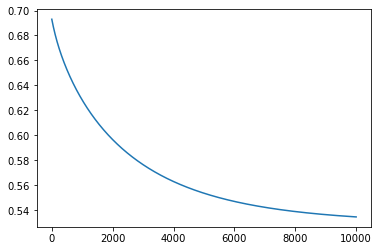

In [33]:
plt.plot(all_costs)

In [34]:
X_low=X2
def drawCircle():
    x1, x2 = np.meshgrid(np.linspace(X_low[:, 1].min(), X_low[:, 1].max(), 100),
                         np.linspace(X_low[:, 2].min(), X_low[:, 2].max(), 100))
    Z = Sigmoid(mapping(np.c_[np.ones(x1.size), x1.ravel(), x2.ravel()]) @ theta).reshape(x1.shape)

    plt.contour(x1, x2, Z, 0)
    plt.scatter(X_low[np.where(y==1),1],X_low[np.where(y==1),2], label="y=1",marker ='o')
    plt.scatter(X_low[np.where(y==0),1],X_low[np.where(y==0),2], label="y=0",marker ='x')

    plt.xlabel('x 1')
    plt.ylabel('x 2')

In [35]:
def predict(X):
    y_pred = np.zeros((X.shape[0], 1))
    y_pred[np.where(Sigmoid(mapping(X) @ theta) > 0.5)] = 1
    return y_pred

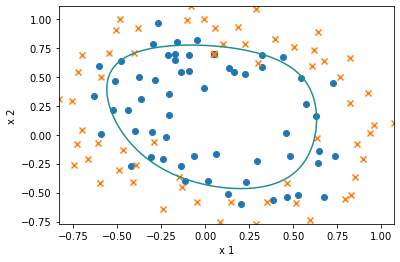

In [36]:
drawCircle()

# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [28]:
n=X2.shape[1]
theta = np.zeros((n, 1))
theta.shape

(28, 1)

Calculer le cout initial

In [12]:
initialCost=computeCostReg(X2, y, theta,1)
print(initialCost)

[0.69314718]


Appel des la fonction de calcul du gradient

In [29]:
# paramètres
iterations = 10000;
alpha = 0.01;

# paramètre de regression
lambdaa = 1;

# Appel
# theta = gradientDescent(X2, y, theta, alpha, iterations);
print(theta)


[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


Traçage de la fonction du coût

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

# Dessin de la limite de decision (Descision Boundary)
Dans cette partie, nous aimerions dessiner la ligne separatrice d nos données

In [12]:
def drawCircle():
    x1, x2 = np.meshgrid(np.linspace(X2[:, 1].min(), X2[:, 1].max(), 100),
                         np.linspace(X2[:, 2].min(), X2[:, 2].max(), 100))
    Z = Sigmoid(mapping(np.c_[np.ones(x1.size), x1.ravel(), x2.ravel()]) @ theta).reshape(x1.shape)

    plt.contour(x1, x2, Z, 0)
    plt.scatter(X2[np.where(y==1),1],X2[np.where(y==1),2], label="y=1",marker ='o')
    plt.scatter(X2[np.where(y==0),1],X2[np.where(y==0),2], label="y=0",marker ='x')

    plt.xlabel('x 1')
    plt.ylabel('x 2')

# Classification (Prédiction)
Ici il serait interessant de calculer la prédiction en utilisant un seuil
i.e. si h>seuil alors classe =1 sinon classe = 0

In [192]:
def predict(X):
    y_pred = np.zeros((X.shape[0], 1))
    yy=Sigmoid(mapping(X) @ theta)
    for i in yy:
        if yy[i]>0.5:
            y_pred[i]=1
    return y_pred

# Affichage 
Graphe representant les acceptations selon les caracteristiques

C:\Users\LENOVO~1\AppData\Local\Temp/ipykernel_1736/3775160104.py:6: UserWarning: No contour levels were found within the data range.
  plt.contour(x1, x2, Z, 0)


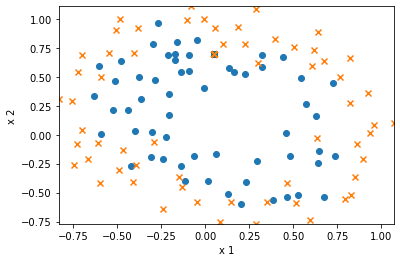

In [208]:
drawCircle()

Traçage du coût en fonction de theta0 et theta1

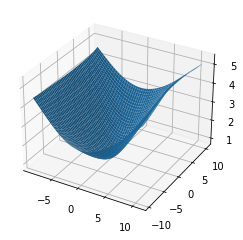

In [193]:
theta_0_range, theta_1_range = np.meshgrid(np.arange(theta[0] - 10, theta[0] + 10, 0.1), 
                                           np.arange(theta[1] - 10, theta[1] + 10, 0.1))
theta_mesh = np.expand_dims(np.stack((theta_0_range, theta_1_range), axis=-1), axis=3)
loss = np.asarray(
    [
        [computeCostReg(X, y, np.concatenate((theta_mesh[i, j], theta[2:]), axis=0))[0]
             for j in range(theta_mesh.shape[1])
        ] 
        for i in range(theta_mesh.shape[0])
    ]
)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(theta_0_range, theta_1_range, loss)

# Qualité du classifieur

Prédire des valeurs de y

Ici il serait interessant de calculer la précision de notre classifieur

Essayons de calculer ça avec 

moyenne(y==y-pred) * 100

Ceci donnera un pourcentage de precision

In [121]:
# calcul de precision = nombre de valeurs bien prédites (ici sur toute la base X)
y_pred=predict(X)
prcision = np.mean(y==y_pred)*100
prcision

83.05084745762711

# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

In [37]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


scikit_log_reg = LogisticRegression()
clf= scikit_log_reg.fit(X2,np.ravel(y))
y_pred_sickit = clf.predict(X2)
print('*************** classification report using Sklearn: ******************\n')
print(classification_report(y, y_pred_sickit))


*************** classification report using Sklearn: ******************

              precision    recall  f1-score   support

         0.0       0.90      0.75      0.82        60
         1.0       0.78      0.91      0.84        58

    accuracy                           0.83       118
   macro avg       0.84      0.83      0.83       118
weighted avg       0.84      0.83      0.83       118



# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 01 Avril 2022 à 22h


In [ ]:
# bonne chance